# Chapter 08

## Handling images

In [50]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
cv2.__version__

### 8.1 Loding images

In [ ]:
image = cv2.imread('/Users/gabrielfuentes/Documents/Readings/Books/Python Machine Learning Cookbook/machine-learning/plane.jpg', 
                    cv2.IMREAD_GRAYSCALE)

In [ ]:
image

In [ ]:
plt.imshow(image, cmap='gray'), plt.axis('off')
plt.show()

In [ ]:
image.shape

In [ ]:
image_bgr = cv2.imread('/Users/gabrielfuentes/Documents/Readings/Books/Python Machine Learning Cookbook/machine-learning/plane.jpg',
                        cv2.IMREAD_COLOR)

image_bgr[0,0]

In [ ]:
image_bgr

In [ ]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis('off')
plt.show()

### 8.2 Saving images

In [13]:
path = '/Users/gabrielfuentes/Documents/Readings/Books/Python Machine Learning Cookbook/machine-learning/'
image = cv2.imread(path + 'plane.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imwrite(path + 'plane_new.jpg', image)

True

### 8.3 Resizing images

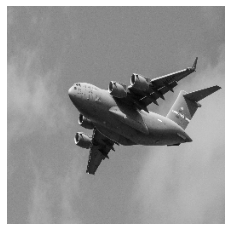

In [63]:
image_resize = cv2.resize(image, (256, 256))
plt.imshow(image_resize, cmap='gray'), plt.axis('off')
plt.show()

In [64]:
cv2.imwrite(path + 'plane_new.jpg', image_resize)

True

### 8.4 Cropping images

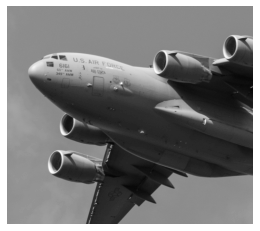

In [35]:
cropped = image[550:1700, 900:2200]
plt.imshow(cropped, cmap='gray'), plt.axis('off')
plt.show()

### 8.5 Blurring images

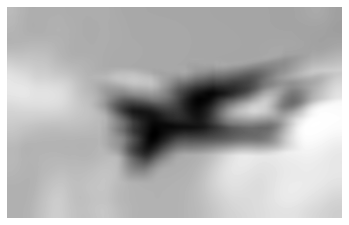

In [40]:
blur = cv2.blur(image, (300, 300))
plt.imshow(blur, cmap='gray'), plt.axis('off')
plt.show()

In [54]:
kernel = np.ones((5, 5)) / 25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

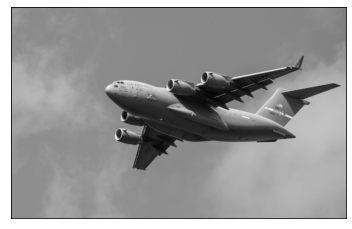

In [53]:
image_kernel = cv2.filter2D(image, -1, kernel)
plt.imshow(image_kernel, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

### 8.6 Sharpening images

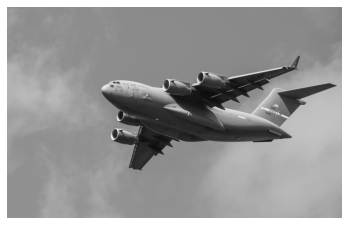

In [58]:
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

enhancesharp = cv2.filter2D(image, -1, kernel)

plt.imshow(sharp, cmap='gray'), plt.axis('off')
plt.show()

### 8.7 Enhancing contrast

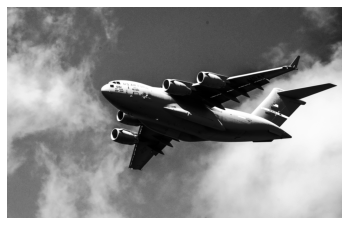

In [59]:
enhance = cv2.equalizeHist(image)
plt.imshow(enhance, cmap='gray'), plt.axis('off')
plt.show()

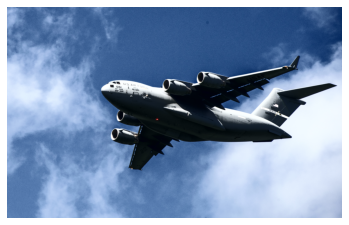

In [60]:
from cv2 import COLOR_YUV2RGB, cvtColor

image_bgr = cv2.imread(path + 'plane.jpg')
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(image_rgb, cmap='gray'), plt.axis('off')
plt.show()

### 8.8 Isolating colors

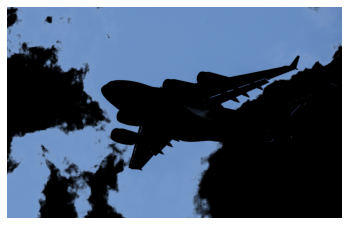

In [72]:
image = cv2.imread(path + 'plane.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([50, 100, 50])
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

masked = cv2.bitwise_and(image, image, mask = mask)

image_rgb = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb), plt.axis('off')
plt.show()


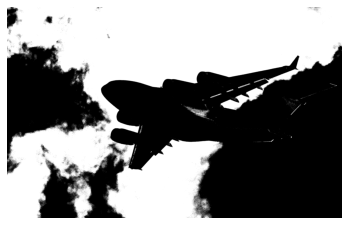

In [74]:
plt.imshow(mask, cmap='gray'), plt.axis('off')
plt.show()

### 8.9 Binarazing images

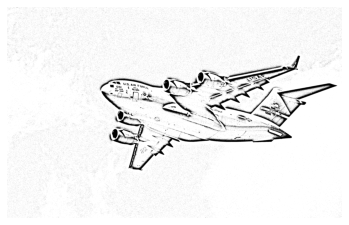

In [77]:
image = cv2.imread(path + 'plane.jpg', cv2.IMREAD_GRAYSCALE)

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10

image_mean_thresholdimage_binarized = cv2.adaptiveThreshold(
    image,
    max_output_value,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    neighborhood_size,
    subtract_from_mean
)

plt.imshow(image_binarized, cmap='gray'), plt.axis('off')
plt.show()

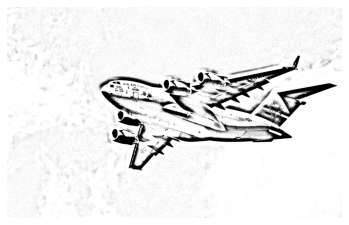

In [78]:
image_mean_threshold = cv2.adaptiveThreshold(
    image,
    max_output_value,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    neighborhood_size,
    subtract_from_mean
)

plt.imshow(image_mean_threshold, cmap='gray'), plt.axis('off')
plt.show()


### 8.10 Removing backgrounds

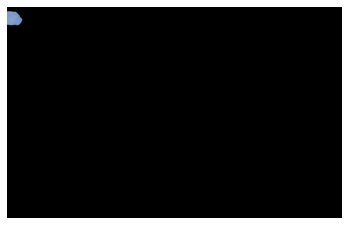

In [83]:
image_bgr = cv2.imread(path + 'plane.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

rectangle = (0, 56, 256, 150)

mask = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(
    image_rgb,
    mask,
    rectangle,
    bgdModel,
    fgdModel,
    5,
    cv2.GC_INIT_WITH_RECT
)

mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

### 8.11 Detecting edges

In [2]:
path = '/Users/gabrielfuentes/Documents/Readings/Books/Python Machine Learning Cookbook/machine-learning/'
image = cv2.imread(path + 'plane.jpg', cv2.IMREAD_GRAYSCALE)

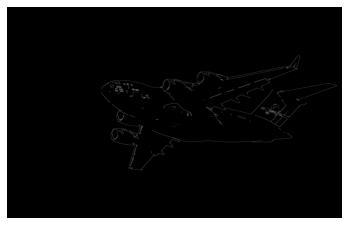

In [5]:
median_intensity = np.median(image)
lower = int(max(0, (1.0 - 0.33) * median_intensity))
upper = int(max(255, (1.0 + 0.33) * median_intensity))

canny = cv2.Canny(image, lower, upper)

plt.imshow(canny, cmap='gray'), plt.axis('off')
plt.show()